# Sentiment Analysis of Stock Market News Data
* The goal is to classify text into categories such as positive or negative.

## Models for Sentiment Analysis
1. **Baseline Model: Logistic Regression**: A baseline model that uses traditional machine learning techniques with text features. 
2. **Intermediate Model: Recurrent Neural Networks (RNNs) with LSTM**:  Captures sequential dependencies and context in text.
3. **Advanced Model: Transformers (BERT etc.)**: Provides state-of-the-art performance by leveraging deep contextual understanding.

# Get Utils file from Github 
https://github.com/kamran945/NLP-Text-Classification/raw/main/nlp_sentiment_utils.py

In [1]:
!pip install contractions # required in utils file

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 6.2 MB/s eta 0:00:00


In [2]:
import os

file_name = "nlp_sentiment_utils.py"
github_url = "https://github.com/kamran945/NLP-Text-Classification/raw/main/nlp_sentiment_utils.py"

if not os.path.exists(file_name):
    print(f"{file_name} not found. Downloading from GitHub...")
    !wget {github_url} -O {file_name}
else:
    print(f"{file_name} already exists. No need to download.")

import nlp_sentiment_utils

nlp_sentiment_utils.py not found. Downloading from GitHub...
--2024-08-24 15:40:00--  https://github.com/kamran945/NLP-Text-Classification/raw/main/nlp_sentiment_utils.py
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kamran945/NLP-Text-Classification/main/nlp_sentiment_utils.py [following]
--2024-08-24 15:40:00--  https://raw.githubusercontent.com/kamran945/NLP-Text-Classification/main/nlp_sentiment_utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5484 (5.4K) [text/plain]
Saving to: 'nlp_sentiment_utils.py'

nlp_sentiment_utils 100%[===================>]   5.36K  --.-KB/s    in 0s   

# Load and Explore the data

In [3]:
import pandas as pd

df = pd.read_csv("/kaggle/input/stockmarket-sentiment-dataset/stock_data.csv")
df.head()

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


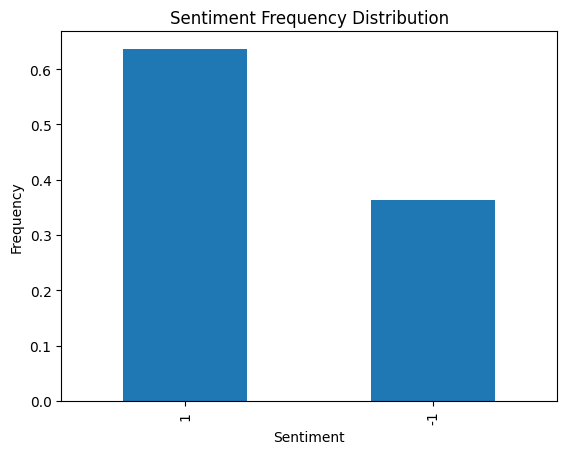

In [4]:
# check distribution of classes
import matplotlib.pyplot as plt

df["Sentiment"].value_counts(normalize=True).plot(kind='bar')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Sentiment Frequency Distribution');

In [5]:
df["Sentiment"].replace(-1, 0, inplace=True) # replace -1 with 0
df.rename(columns={'Text': 'text'}, inplace=True) # rename 'Text' column to 'text'
df.tail()

/tmp/ipykernel_36/2897842247.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Sentiment"].replace(-1, 0, inplace=True) # replace -1 with 0


,text,Sentiment
5786,Industry body CII said #discoms are likely to ...,0
5787,"#Gold prices slip below Rs 46,000 as #investor...",0
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1
5790,"#Sensex, #Nifty climb off day's highs, still u...",1


## Clean Text

In [6]:
from nltk.corpus import stopwords
import re

stop_words = stopwords.words('english')
important_stop_words = ['not', 'no', 'nor', "isn't", "aren't", "wasn't", "weren't", "haven't", "hasn't", "hadn't", "doesn't", "don't", "didn't", "won't", "wouldn't", "shan't", "shouldn't", "can't", "couldn't", "mustn't", "mightn't", "needn't"]

stop_words = [word for word in stop_words if not re.match(r'^(not|no|nor|\w*\'?n?t|[\w]*n$)$', word)]
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'which', 'who', 'whom', 'this', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'the', 'and', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'by', 'for', 'with', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'off', 'over', 'under', 'further', 'once', 'here', 'there', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'other', 'some', 'such', 'only', 'same', 'so', 'too', 'very', 's', 'will', 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ma']


In [7]:
df = nlp_sentiment_utils.clean_text(df, column="text")
df

,text,Sentiment
0,Kickers watchlist XIDE TIT SOQ PNK CPW BPZ AJ ...,1
1,user AAP MOVIE return FEAGEED indicator trades...,1
2,user Id afraid short AMZN looking like nearmon...,1
3,MNTA Over,1
4,OI Over,1
...,...,...
5786,Industry body CII said discoms likely suffer n...,0
5787,Gold prices slip Rs investors book profits ami...,0
5788,Workers Bajaj Auto agreed wage cut period Apri...,1
5789,Sharemarket LIVE Sensex days high points Nifty...,1


## Vocabulary

In [8]:
vocabulary = nlp_sentiment_utils.get_vocabulary(df, column='text')

Total words in vocabulary: 10622

Most common 50 words in vocabulary:
 [('AAP', 920), ('user', 642), ('I', 575), ('short', 342), ('today', 291), ('like', 278), ('day', 273), ('volume', 269), ('long', 253), ('BAC', 202), ('good', 199), ('GOOG', 195), ('stock', 194), ('The', 183), ('move', 176), ('back', 167), ('still', 163), ('not', 163), ('new', 159), ('buy', 155), ('higher', 152), ('nice', 152), ('see', 150), ('Sensex', 150), ('next', 148), ('watch', 146), ('going', 146), ('Nifty', 141), ('one', 138), ('week', 135), ('close', 131), ('stop', 130), ('To', 130), ('looking', 129), ('break', 126), ('time', 121), ('ong', 121), ('Triangle', 121), ('support', 117), ('NFX', 117), ('last', 115), ('go', 114), ('looks', 114), ('market', 112), ('could', 109), ('highs', 107), ('In', 106), ('AMZN', 104), ('trade', 103), ('stocks', 102)]


In [9]:
reduced_vocab = nlp_sentiment_utils.reduce_vocabulary(vocabulary, quantile=0.95)

Total words in previous vocabulary: 10622
Total words in reduced vocabulary: 560

Most common 50 words in reduced vocabulary:
 [('AAP', 920), ('user', 642), ('I', 575), ('short', 342), ('today', 291), ('like', 278), ('day', 273), ('volume', 269), ('long', 253), ('BAC', 202), ('good', 199), ('GOOG', 195), ('stock', 194), ('The', 183), ('move', 176), ('back', 167), ('still', 163), ('not', 163), ('new', 159), ('buy', 155), ('higher', 152), ('nice', 152), ('see', 150), ('Sensex', 150), ('next', 148), ('watch', 146), ('going', 146), ('Nifty', 141), ('one', 138), ('week', 135), ('close', 131), ('stop', 130), ('To', 130), ('looking', 129), ('break', 126), ('time', 121), ('ong', 121), ('Triangle', 121), ('support', 117), ('NFX', 117), ('last', 115), ('go', 114), ('looks', 114), ('market', 112), ('could', 109), ('highs', 107), ('In', 106), ('AMZN', 104), ('trade', 103), ('stocks', 102)]


### View Vocabualry

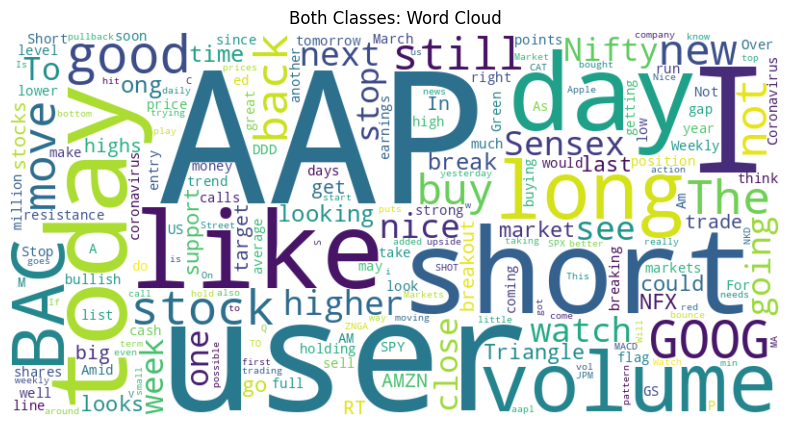

In [10]:
nlp_sentiment_utils.plot_wordcloud(vocabulary, title='Both Classes: Word Cloud')

Total words in vocabulary: 7844

Most common 50 words in vocabulary:
 [('AAP', 513), ('user', 440), ('I', 382), ('volume', 224), ('today', 223), ('long', 210), ('day', 206), ('like', 190), ('BAC', 154), ('good', 152), ('move', 140), ('stock', 140), ('nice', 136), ('higher', 131), ('new', 130), ('watch', 127), ('buy', 122), ('back', 122), ('GOOG', 121), ('still', 117), ('ong', 114), ('week', 102), ('see', 99), ('close', 96), ('The', 96), ('highs', 95), ('next', 95), ('breakout', 93), ('going', 92), ('break', 92), ('stop', 91), ('looks', 90), ('looking', 89), ('one', 89), ('Sensex', 81), ('not', 80), ('go', 76), ('trade', 75), ('line', 75), ('time', 75), ('last', 75), ('Nifty', 74), ('list', 72), ('could', 72), ('strong', 72), ('bullish', 71), ('support', 70), ('resistance', 70), ('NFX', 69), ('big', 69)]
Total words in vocabulary: 5849

Most common 50 words in vocabulary:
 [('AAP', 407), ('short', 276), ('user', 202), ('I', 193), ('like', 88), ('The', 87), ('not', 83), ('To', 77), ('GOO

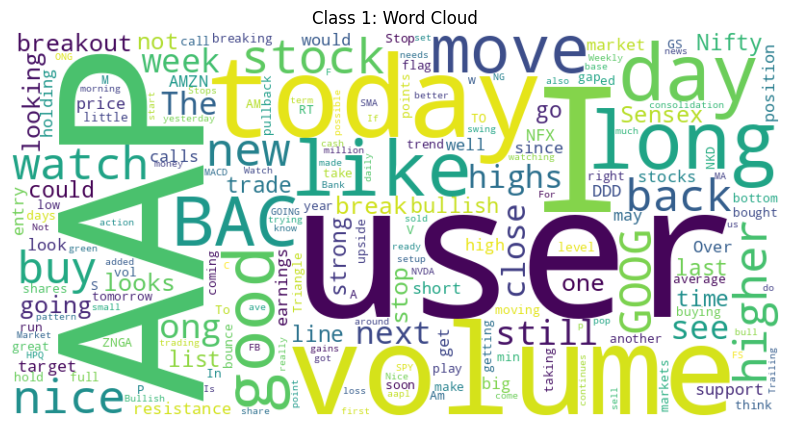

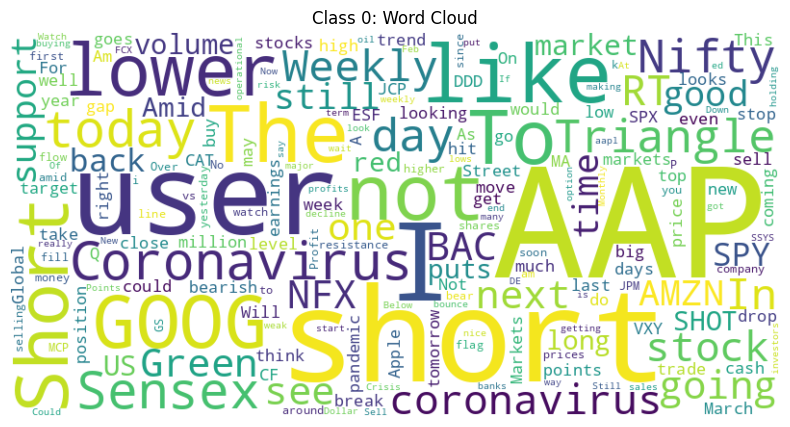

In [11]:
# get vocabulary for different classes

vocab_class_1 = nlp_sentiment_utils.get_vocabulary(df[df["Sentiment"] == 1])
vocab_class_0 = nlp_sentiment_utils.get_vocabulary(df[df["Sentiment"] == 0])
nlp_sentiment_utils.plot_wordcloud(vocab_class_1, title='Class 1: Word Cloud')
nlp_sentiment_utils.plot_wordcloud(vocab_class_0, title='Class 0: Word Cloud')


# Create Train, Validation and Test Splits

In [12]:
from sklearn.model_selection import train_test_split

X = df['text']  # Feature
y = df['Sentiment']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, 
                                                stratify=y_test, random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val), len(X_test), len(y_test)

(4632, 4632, 579, 579, 580, 580)

In [13]:
import numpy as np
np.sum(y_train == 1) / len(y_train), np.sum(y_val == 1) / len(y_val), np.sum(y_test == 1) / len(y_test)

(0.6362262521588946, 0.6373056994818653, 0.6362068965517241)

# Baseline: Logistic Regression Model

## Count Vectorizer
* CountVectorizer implements the Bag of Words (BoW) model
* **BoW Model**: Represents text data as a collection of words and their frequencies, ignoring grammar and word order. **Counts the occurrences of each word** in the documents and converts these counts into a numerical feature matrix.

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

vectorizer_count = CountVectorizer() 

X_train_count = vectorizer_count.fit_transform(X_train)

X_val_count = vectorizer_count.transform(X_val)
X_test_count = vectorizer_count.transform(X_test)

model = LogisticRegression(class_weight='balanced')
model.fit(X_train_count, y_train)

LogisticRegression(class_weight='balanced')

In [15]:
from sklearn.metrics import accuracy_score, classification_report
from collections import defaultdict

eval_metrics = defaultdict(dict)

y_pred = model.predict(X_val_count)
eval_metrics.update({'logistic_reg_count': nlp_sentiment_utils.get_eval_metrics(y_val, y_pred)})
print(classification_report(y_val, y_pred))

Accuracy: 0.77
Precision: 0.83
Recall: 0.81
F1 Score: 0.82
              precision    recall  f1-score   support

           0       0.68      0.70      0.69       210
           1       0.83      0.81      0.82       369

    accuracy                           0.77       579
   macro avg       0.75      0.76      0.75       579
weighted avg       0.77      0.77      0.77       579



## TF-TDF Vectorizer

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf = TfidfVectorizer()

X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)

X_val_tfidf = vectorizer_tfidf.transform(X_val)
X_test_tfidf = vectorizer_tfidf.transform(X_test)

model = LogisticRegression(class_weight='balanced')
model.fit(X_train_tfidf, y_train)

LogisticRegression(class_weight='balanced')

In [17]:
from sklearn.metrics import accuracy_score, classification_report
from collections import defaultdict

y_pred = model.predict(X_val_tfidf)
eval_metrics.update({'logistic_reg_tfidf': nlp_sentiment_utils.get_eval_metrics(y_val, y_pred)})
print(classification_report(y_val, y_pred))

Accuracy: 0.78
Precision: 0.84
Recall: 0.81
F1 Score: 0.82
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       210
           1       0.84      0.81      0.82       369

    accuracy                           0.78       579
   macro avg       0.76      0.77      0.76       579
weighted avg       0.78      0.78      0.78       579



In [18]:
eval_metrics

defaultdict(dict,
            {'logistic_reg_count': {'Accuracy': 0.772020725388601,
              'Precision': 0.8264462809917356,
              'Recall': 0.8130081300813008,
              'F1 Score': 0.8196721311475411},
             'logistic_reg_tfidf': {'Accuracy': 0.7789291882556131,
              'Precision': 0.8375350140056023,
              'Recall': 0.8102981029810298,
              'F1 Score': 0.8236914600550964}})

# RNN Model (LSTM Based) using PyTorch

## Prepare the data for Deep Learning Model

## LSTM Model

In [19]:
import torch
import torch.nn as nn

class LSTMClassifierWithEmbedding(nn.Module):
    def __init__(self, vocab_size, embedding_dim, 
                 hidden_size, num_classes, num_layers=1, 
                 dropout=0.5):
        
        super(LSTMClassifierWithEmbedding, self).__init__()
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, 
                            hidden_size, 
                            num_layers, # number of stacked layers in lstm
                            batch_first=True, # first dimension represents the batch size
                            dropout=dropout,
                            bidirectional=False)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.dropout = nn.Dropout(dropout)
    
    def forward(self, x):
        # Apply embedding layer
        x = self.embedding(x)
        
        # Forward pass through LSTM
        lstm_out, _ = self.lstm(x) 
        
        # Take the output from the last time step
        # Last step in the sequence represents the entire sequence
        # This is generally done for classification tasks
        lstm_out = lstm_out[:, -1, :] 
        
        # Apply dropout
        lstm_out = self.dropout(lstm_out)
        
        # Fully connected layer
        out = self.fc(lstm_out)
        
        return out


In [20]:
# work in progress



# import torch
# import torch.nn as nn
# import torch.optim as optim

# vocab_size = reduced_vocabulary
# embedding_dim = 256
# hidden_size = 128
# num_classes = 2
# num_layers = 3

# model_lstm = LSTMClassifierWithEmbedding(vocab_size, embedding_dim, 
#                                          hidden_size, num_classes,
#                                          num_layers=num_layers)
# loss_fcn = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model_lstm.parameters(), lr=0.001)

# # Training loop
# num_epochs = 10
# for epoch in range(num_epochs):
#     for inputs, labels in dataloader:
#         # Forward pass
#         outputs = model_lstm(inputs)
#         loss = loss_fcn(outputs, labels)
        
#         # Backward pass and optimization
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()